C:\Users\makir\AppData\Local\Temp\ipykernel_9656\1672949583.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_adm = data.groupby("AdmArea").sum()["PASSES_OVER_220"].sort_values()


(221, b'2.0.0 Closing connecton')

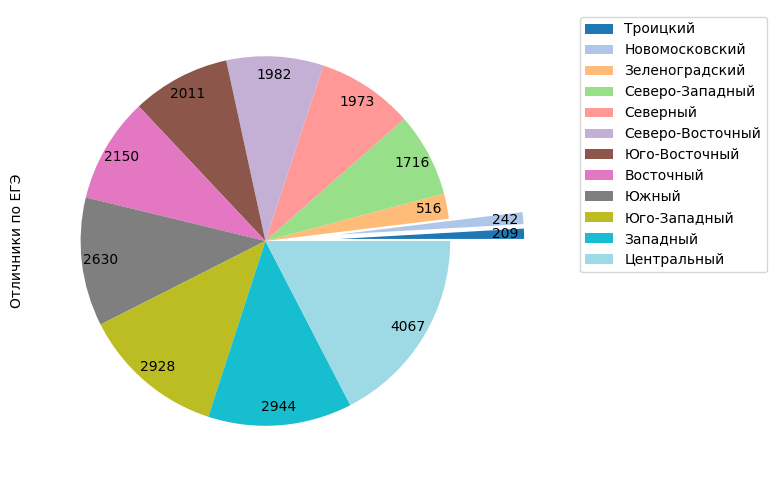

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pdfkit
from io import BytesIO
import binascii
import smtplib
from email import encoders
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart

data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data = data[data["YEAR"] == "2018-2019"]
data_best = data.sort_values("PASSES_OVER_220", ascending=False).head(1)
data["AdmArea"] = data["AdmArea"].apply(lambda x: x.split(" ")[0])
data_adm = data.groupby("AdmArea").sum()["PASSES_OVER_220"].sort_values()
total = data_adm.sum()

fig = plt.figure(figsize=(11,6))
area = fig.add_subplot(1,1,1)
explode = [0]*len(data_adm)
explode[0] = 0.4
explode[1] = 0.4
data_adm.plot.pie(ax = area,
                labels=[""]*len(data_adm),
                label="Отличники по ЕГЭ",
                cmap="tab20",
                autopct=lambda x:int(round(total * x/100)),
                pctdistance=0.9,
                explode=explode)
plt.legend(data_adm.index, bbox_to_anchor=(1.5,1,0.1,0))
img = BytesIO()
plt.savefig(img)
img = 'data:image/png;base64,' + binascii.b2a_base64(img.getvalue(),
                          newline=False).decode("UTF-8")
pd.set_option("display.max_colwidth", 1000)

html = '''<html>
   <head>
    <title>Результаты ЕГЭ Москвы: отличники</title>
    <meta charset="utf-8"/>
    </head>
    <body>
    <h1>Результаты ЕГЭ Москвы: отличники в 2018-2019 году</h1>
    <p>Всего: ''' + str(total) + '''</p>
<img src="''' + img + '''" alt="Отличники по округам"/>
    <p>Лучшая школа: ''' + str(data_best["EDU_NAME"].values[0]) + '''</p>
    </body>
    </html>'''
config = pdfkit.configuration(wkhtmltopdf="C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe")
options = {
           'page-size': 'A4',
           'header-right': '[page]'
    }
pdfkit.from_string(html, 'ege.best.pdf',
                   configuration=config, options=options)

letter = MIMEMultipart()
letter["From"] = "anz3623@yandex.ru"
letter["Subject"] = "Результаты по ЕГЭ в Москве"
letter["Content-Type"] = "text/html; charset=utf-8"
letter["To"] = "makira1977@yandex.ru"
letter.attach(MIMEText(html, "html"))
attachement = MIMEBase("application", "pdf")
attachement.set_payload(open("ege.best.pdf", "rb").read())
attachement.add_header("Content-Disposition",
                   'attachement; filename="ege.best.pdf"')
encoders.encode_base64(attachement)
letter.attach(attachement)
user = "XXXX"
password = "XXXX"
server = smtplib.SMTP_SSL("smtp.yandex.ru", 465)
server.login(user, password)
server.sendmail("anz3623@yandex.ru",
                  "makira1977@yandex.ru",
                letter.as_string())
server.quit()